# Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for
distribution of age with respect to each gender along with the information about whether
they survived or not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics.

### plots :
boxplot<br>
barplot<br>
swam<br>
voilin<br>
stripplot<br>

## Roll no: 31127


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')
if df.empty == False:
    print("dataset loaded!")

dataset loaded!


In [3]:
df.head(5)
print(df.shape)
print(df.columns)
print(df.describe())
print(df.info())
print(df.isnull().sum())
print("Total null values: {}".format(df.isnull().sum().sum()))

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 colu

In [4]:
df.age = df.age.fillna(df.age.mean())
df.deck = df.deck.fillna(df.deck.mode())
df.embark_town = df.embark_town.fillna(df.embark_town.mode())
df.embarked = df.embarked.fillna(df.embark_town.mode())

In [5]:
df.shape
print("Total null values: {}".format(df.isnull().sum().sum()))

Total null values: 691


# Visualization

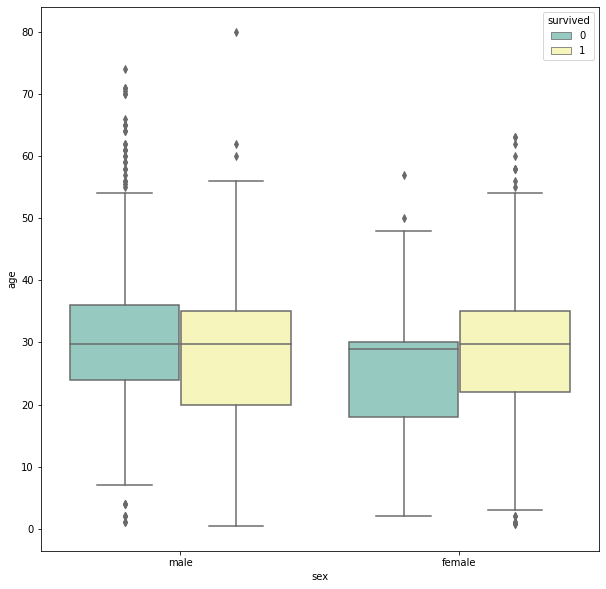

In [6]:
#boxplot
plt.figure(figsize = (10,10))
sns.boxplot(data=df,x='sex',y='age',hue='survived',palette="Set3")
plt.show()

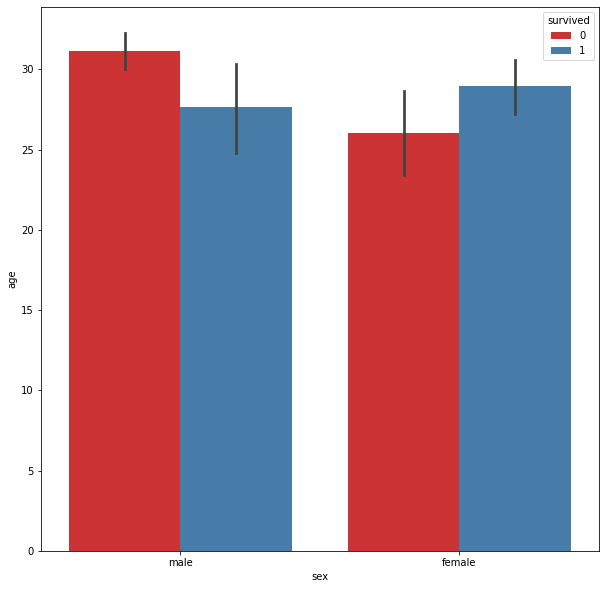

In [7]:
#barplot
plt.figure(figsize = (10,10))
sns.barplot(data=df,x='sex',y='age',hue='survived',palette="Set1")
plt.show()

/home/vimal/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vimal/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


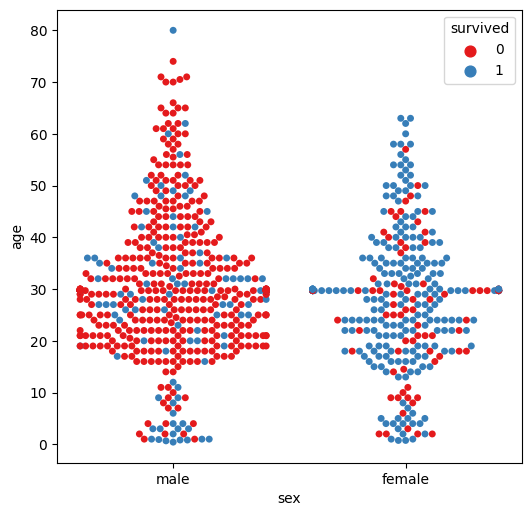

In [8]:
#swarmplot
plt.figure(figsize = (6,6),dpi=100)
sns.swarmplot(data=df,x='sex',y='age',hue='survived',palette="Set1")
plt.show()

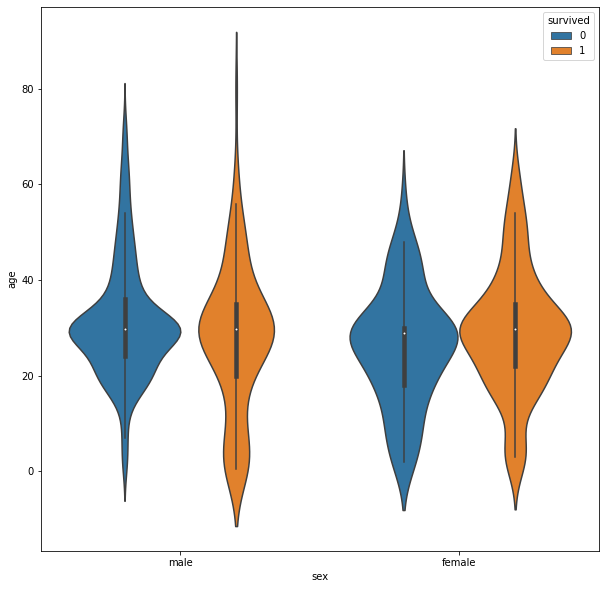

In [23]:
#violinplot
plt.figure(figsize = (10,10))
sns.violinplot(data=df,x='sex',y='age',hue='survived')
plt.show()

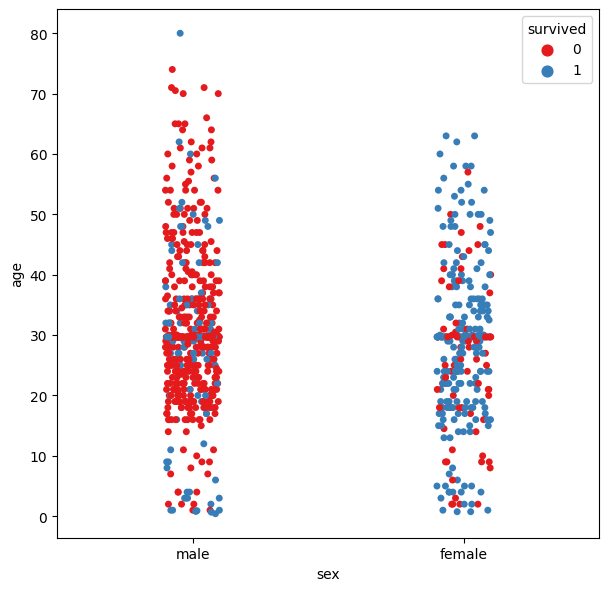

In [9]:
#stripplot
plt.figure(figsize = (7,7),dpi=100)
sns.stripplot(data=df,x='sex',y='age',hue='survived',palette="Set1")
plt.show()

In [10]:
def outlierDetection (i,df):
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(df[i] >= (Q3+(1.5*IQR)))
    # Lower bound
    lower = np.where(df[i] <= (Q1-(1.5*IQR)))

    ''' Removing the Outliers '''
    df.drop(upper[0], axis=0, inplace = True)
    df.drop(lower[0], axis=0, inplace = True)

In [11]:
outlierDetection('age',df)
df = df.reset_index(drop=True)

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
821,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
822,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
823,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


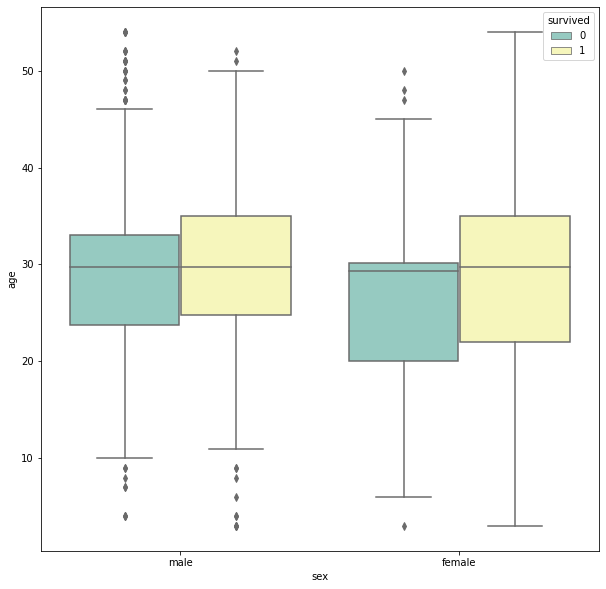

In [13]:
#boxplot
plt.figure(figsize = (10,10))
sns.boxplot(data=df,x='sex',y='age',hue='survived',palette="Set3")
plt.show()